In [8]:
import pandas as pd
import os

# 切换到项目根目录或目标数据目录
os.chdir("/Users/dallylovely/Desktop/CCGG/Projects/recommendation_system")

In [2]:
import pandas as pd
from src.recall.cf.dataset_cf import load_valid_item_ids, load_cf_behavior_df

behavior_csv = "data/raw/user_behavior_log_info.csv"
item_csv = "data/raw/item_metadata.csv"

In [3]:
# 1. 加载合法的 item_id 集合
valid_item_ids = load_valid_item_ids(item_csv)
print(f"✅ 合法 item 数量: {len(valid_item_ids)}")

✅ 合法 item 数量: 419


In [4]:

# 2. 加载并清洗 CF 数据
cf_df = load_cf_behavior_df(
    behavior_csv=behavior_csv,
    days_window=30,           # 时间窗口 (默认 30 天)
    valid_item_ids=valid_item_ids,
    chunksize=100_000         # 分块大小
)

2025-08-26 13:07:40,363 INFO:🔄 Preparing CF behavior data...
2025-08-26 13:08:11,865 INFO:Max behavior date found: 2024-11-12 00:00:00, window from 2024-10-14 00:00:00 to 2024-11-13 00:00:00
2025-08-26 13:08:12,266 INFO:Filtered chunk by valid item_ids: 46421 → 1450
2025-08-26 13:08:12,279 INFO:Filtered chunk by valid actions: 1450 → 1450
2025-08-26 13:08:12,643 INFO:Filtered chunk by valid item_ids: 47080 → 1394
2025-08-26 13:08:12,647 INFO:Filtered chunk by valid actions: 1394 → 1394
2025-08-26 13:08:13,010 INFO:Filtered chunk by valid item_ids: 46894 → 941
2025-08-26 13:08:13,021 INFO:Filtered chunk by valid actions: 941 → 941
2025-08-26 13:08:13,378 INFO:Filtered chunk by valid item_ids: 46234 → 1100
2025-08-26 13:08:13,382 INFO:Filtered chunk by valid actions: 1100 → 1100
2025-08-26 13:08:13,750 INFO:Filtered chunk by valid item_ids: 46398 → 931
2025-08-26 13:08:13,754 INFO:Filtered chunk by valid actions: 931 → 931
2025-08-26 13:08:14,117 INFO:Filtered chunk by valid item_ids: 46

In [6]:
# 3. 查看结果 DataFrame
print("✅ CF 数据集维度:", cf_df.shape)   # (行数, 列数)
print("✅ 字段:", cf_df.columns.tolist())

# 4. 打印前 5 行
print(cf_df.head())

✅ CF 数据集维度: (112382, 4)
✅ 字段: ['user_id', 'item_id', 'action_type', 'dt']
   user_id  item_id action_type                            dt
0   328862   258882       click 2024-11-02 14:50:49.813515685
1   328862   294555       click 2024-10-26 20:42:50.407235200
2   328862   406349       click 2024-11-11 18:59:48.378575636
3   328862   406349       click 2024-11-11 18:21:08.158534803
4   328862   698318       click 2024-10-22 16:34:25.475853907


In [7]:
# 5. 统计一下有多少用户、多少 item
n_users = cf_df["user_id"].nunique()
n_items = cf_df["item_id"].nunique()
print(f"✅ 用户数: {n_users}, Item 数: {n_items}")

✅ 用户数: 39983, Item 数: 335


In [12]:
df = pd.read_csv("data/raw/user_behavior_log_info.csv", nrows=0, encoding="utf-8-sig")
print(df.columns.tolist())

['user_id', 'item_id', 'author_id', 'year', 'time_stamp', 'action_type', 'timestamp']


In [17]:
# 📌 Step 1: 导入依赖
import pandas as pd
import random

# 修改路径为你自己的文件路径
BEHAVIOR_CSV = "data/raw/user_behavior_log_info.csv"
RECALL_CSV = "output/item_cf/itemcf_recall.csv"


In [18]:
# 📌 Step 2: 读取数据
behavior_df = pd.read_csv(BEHAVIOR_CSV, usecols=["user_id"])
recall_df = pd.read_csv(RECALL_CSV, usecols=["user_id"])

# 转换成整数类型（避免字符串和整数不匹配）
behavior_user_ids = set(pd.to_numeric(behavior_df["user_id"], errors="coerce").dropna().astype(int))
recall_user_ids = set(pd.to_numeric(recall_df["user_id"], errors="coerce").dropna().astype(int))

print(f"行为日志用户总数: {len(behavior_user_ids)}")
print(f"召回结果用户总数: {len(recall_user_ids)}")


行为日志用户总数: 423879
召回结果用户总数: 39983


In [19]:
# 📌 Step 3: 找出召回结果中不存在于行为日志的 user_id
invalid_users = recall_user_ids - behavior_user_ids
print(f"❌ 不在行为日志中的 user_id 数量: {len(invalid_users)}")

if invalid_users:
    print("示例 (最多10个):", list(invalid_users)[:10])
else:
    print("🎉 所有召回结果中的 user_id 都在行为日志中找到")


❌ 不在行为日志中的 user_id 数量: 0
🎉 所有召回结果中的 user_id 都在行为日志中找到


In [20]:
# 📌 Step 4: 随机抽样一些召回结果里的 user_id，验证它们是否在行为日志中
sample_users = random.sample(recall_user_ids, 10)
print("🎲 随机抽样 10 个召回 user_id:")
for uid in sample_users:
    exists = uid in behavior_user_ids
    print(f"user_id {uid}: {'✅ 存在' if exists else '❌ 不存在'}")


🎲 随机抽样 10 个召回 user_id:
user_id 332300: ✅ 存在
user_id 328596: ✅ 存在
user_id 391610: ✅ 存在
user_id 299050: ✅ 存在
user_id 346785: ✅ 存在
user_id 166484: ✅ 存在
user_id 230627: ✅ 存在
user_id 42650: ✅ 存在
user_id 113771: ✅ 存在
user_id 398179: ✅ 存在


/var/folders/gt/0bpw6l095l7fmbtr7428l3n40000gn/T/ipykernel_32589/2961660136.py:2: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  sample_users = random.sample(recall_user_ids, 10)


/Users/dallylovely/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dallylovely/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dallylovely/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20010 (\N{CJK UNIFIED IDEOGRAPH-4E2A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/dallylovely/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


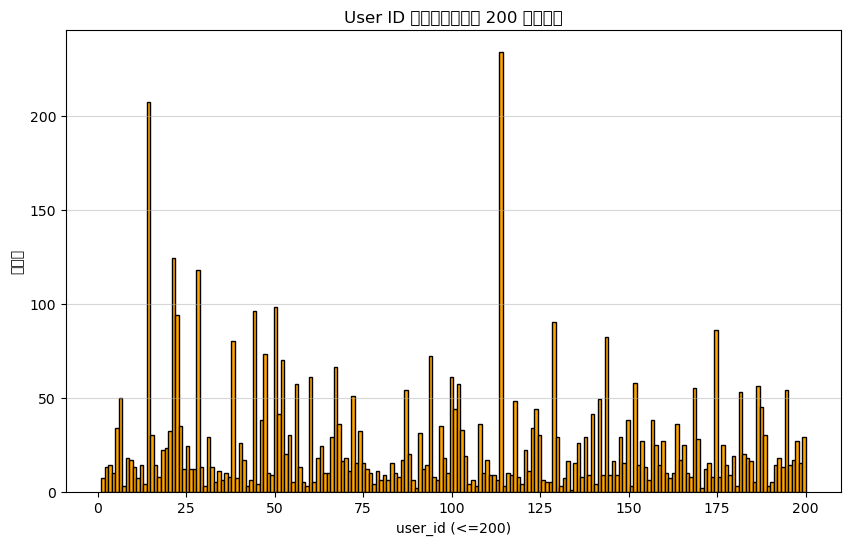

✅ 前200个 user_id 示例: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [22]:
# 📌 Step 5: 只看 user_id <= 200 的分布
import matplotlib.pyplot as plt

subset = behavior_df[behavior_df["user_id"] <= 200]

plt.figure(figsize=(10,6))
plt.hist(subset["user_id"], bins=200, color="orange", edgecolor="black")
plt.title("User ID 分布直方图（前 200 个用户）")
plt.xlabel("user_id (<=200)")
plt.ylabel("用户数")
plt.grid(axis="y", alpha=0.5)
plt.show()

print("✅ 前200个 user_id 示例:", subset["user_id"].drop_duplicates().sort_values().tolist()[:50])

